In [ ]:
# Download file

import os
from requests.auth import HTTPBasicAuth
import requests

def download(url: str, local_filename: str,
             username='None', password='None',
             quiet=True):
    
    headers = {'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
                Chrome/130.0.0.0 Safari/537.36 Edg/130.0.0.0'}
    
    # Check parent directory
    parent_directory = os.path.dirname(local_filename)
    if not os.path.isdir(os.path.dirname(local_filename)):
        print(f"The parent directory '{parent_directory}' does not exist")
        return
    
    # Check if file exists
    if os.path.exists(local_filename):
        print(f"File exists: '{local_filename}'")
        return
    
    # Try download
    try:
        response = requests.head(url, 
                                 headers=headers, stream=True, timeout=540,
                                 auth = HTTPBasicAuth(username, password))
        if response.status_code == requests.codes.ok:
            with requests.get(url,
                              headers=headers, stream=True, timeout=540,
                              auth = HTTPBasicAuth(username, password)) as r:
                r.raise_for_status()
                with open(local_filename, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192):
                        f.write(chunk)
            if not quiet:
                print(f"File '{local_filename}' downloaded")
            return        
        else:
            print(f'HTTP error occurred: {response.status_code}')
    except requests.RequestException:
        print('Invalid url')
        



Text(0, 0.5, '$f_{\\rm True}$')

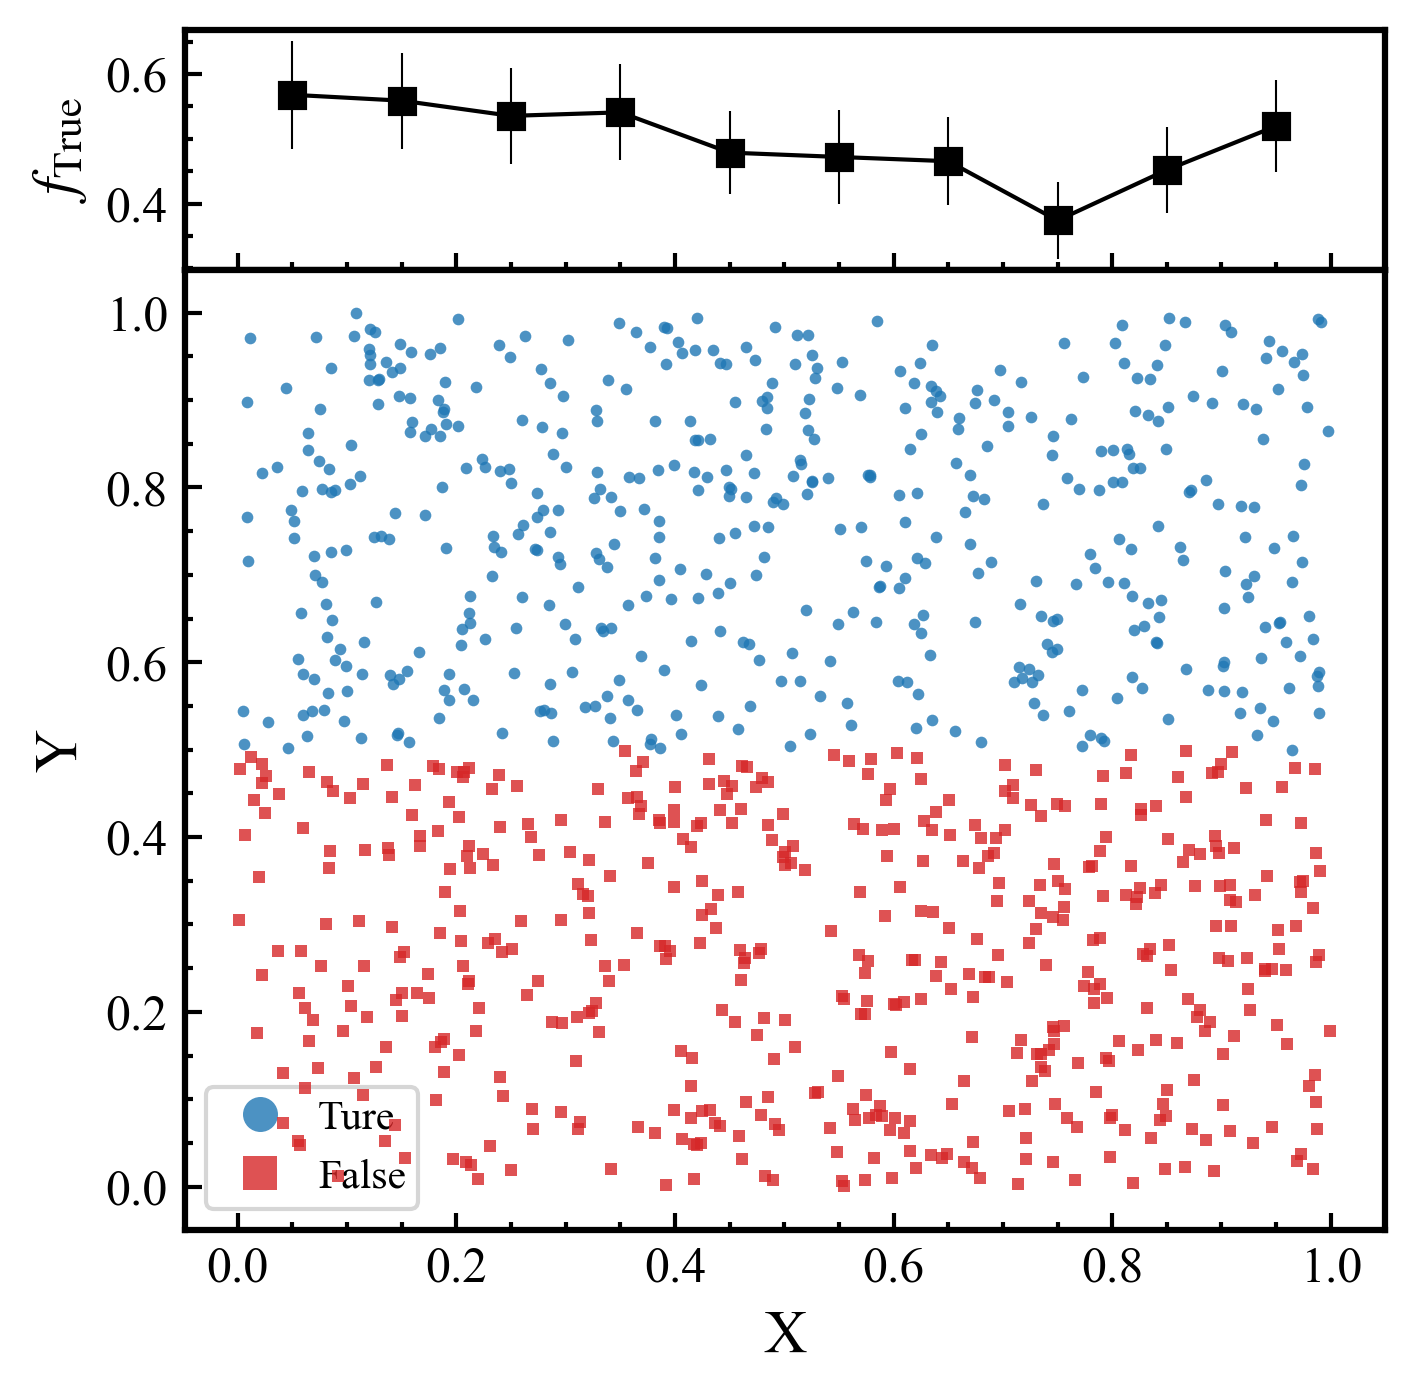

In [38]:
# 2D scatter plot with fraction panel

import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use(os.getenv('OneDrive')+'\\Code\\jin.mplstyle')

xdata = np.random.rand(1000, 1)
ydata = np.random.rand(1000, 1)
ycut = ydata > 0.5

bins = np.array([0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
binx = 0.5*(bins[:-1] + bins[1:])
hist1 = plt.hist(xdata, bins=bins,)
hist2 = plt.hist(xdata[ycut], bins=bins,)
histerr = hist2[0]/hist1[0]
plt.close()

fig = plt.figure(figsize=(5., 5.0))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 1,  width_ratios=None, height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0)
# Create the Axes.
ax2 = fig.add_subplot(gs[0, 0])
ax = fig.add_subplot(gs[1, 0], sharex=ax2)

ax.plot(xdata[ycut], ydata[ycut], 'o', markeredgecolor='none', markerfacecolor='tab:blue', markersize=2.8,alpha=0.8,zorder=10, label='Ture')
ax.plot(xdata[~ycut], ydata[~ycut], 's', markeredgecolor='none', markerfacecolor='tab:red', markersize=2.8,alpha=0.8,zorder=10, label='False')

ax.legend(frameon=True, markerscale=3, fontsize=10, )
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax2.plot(binx, hist2[0]/hist1[0],'k-',marker='s')
ax2.errorbar(binx, hist2[0]/hist1[0],  yerr=(hist2[0]**0.5)/hist1[0], ls=' ', lw=0.5,alpha=1, color = 'k')
ax2.set_ylabel(r'$f_{\rm True}$')